Step 5 - Single Gaussian process modeled with ARMA

In [131]:
#Given a white Gaussian process, which we can anyways generate, and the autocorrelation of the required signal, we need to produce the process itself

In [133]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from pandas import read_csv
from pandas import to_datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from scipy.fft import fft

In [135]:
import warnings
warnings.filterwarnings('ignore')


In [137]:
def parser(x):
    return to_datetime('190' + x, format='%Y-%m')

In [139]:
series = read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)
series.index = series.index.to_period('M')

<Axes: xlabel='Month'>

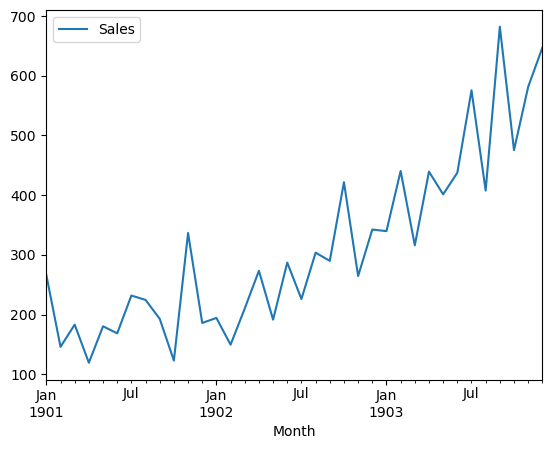

In [141]:
series.plot()

In [143]:
series.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [145]:
series.columns

Index(['Sales'], dtype='object')

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

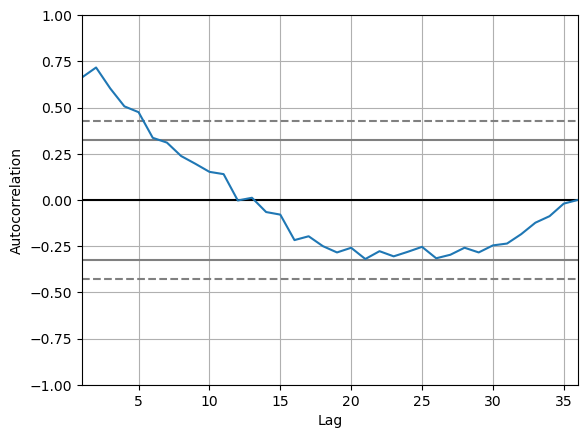

In [147]:
#This is similar to the autocorrelation of a signal 
autocorrelation_plot(series)

(array([4.61877913e+03, 9.04097376e+03, 8.48066239e+03, 7.63787040e+03,
        6.62659121e+03, 5.56830012e+03, 4.56779483e+03, 3.69650713e+03,
        2.98670081e+03, 2.43622191e+03, 2.02031853e+03, 1.70553048e+03,
        1.46107009e+03, 1.26501116e+03, 1.10502680e+03, 9.75373241e+02,
        8.72671483e+02, 7.92705882e+02, 7.29344732e+02, 6.75427357e+02,
        6.24611344e+02, 5.72990226e+02, 5.19688712e+02, 4.66300012e+02,
        4.15589366e+02, 3.70121230e+02, 3.31349768e+02, 2.99385153e+02,
        2.73314285e+02, 2.51767396e+02, 2.33425793e+02, 2.17302198e+02,
        2.02788495e+02, 1.89568441e+02, 1.77504879e+02, 1.66559009e+02,
        1.56737504e+02, 1.48035327e+02, 1.40358893e+02, 1.33454066e+02,
        1.26891708e+02, 1.20155349e+02, 1.12830514e+02, 1.04835863e+02,
        9.65948929e+01, 8.90483645e+01, 8.34572009e+01, 8.10264157e+01,
        8.24608451e+01, 8.76092419e+01, 9.53422916e+01, 1.03740840e+02,
        1.10564365e+02, 1.13864178e+02, 1.12541931e+02, 1.066601

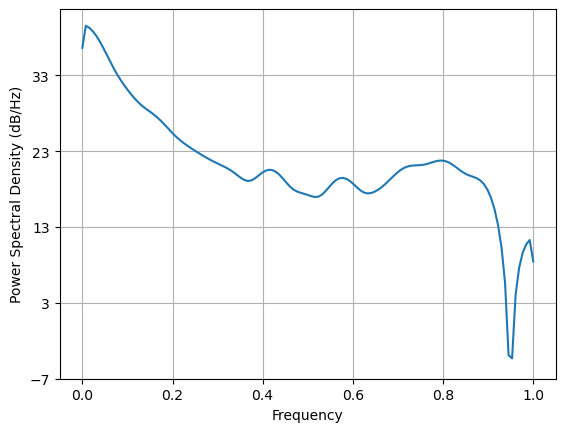

In [149]:
plt.psd(series)

In [187]:
#Given the autocorrelation / PSD of a process, we need to generate that process using the ARMA method
# Split the dataset into training and testing sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

#To train the model to learn the p+q parameters, we use initial training data
history = list(train)
predictions = []

In [189]:
for t in range(len(test)):
    # Fit the ARIMA model as ARMA
    model = ARIMA(history, order=(5, 0, 1))  # ARMA can be represented as ARIMA with d=0
    model_fit = model.fit()
    
    # Make a one-step prediction
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    # Observation from test set
    obs = test[t]
    history.append(obs)
    print('predicted=', yhat, 'expected=', obs)

predicted= 322.46774507168396 expected= [342.3]
predicted= 266.7180791348251 expected= [339.7]
predicted= 348.4666154641876 expected= [440.4]
predicted= 320.47915046858395 expected= [315.9]
predicted= 374.6683638644912 expected= [439.3]
predicted= 358.24390509944743 expected= [401.3]
predicted= 442.8101950949505 expected= [437.4]
predicted= 376.2562906771743 expected= [575.5]
predicted= 431.6026585059948 expected= [407.6]
predicted= 501.49933183187693 expected= [682.]
predicted= 433.8885196676422 expected= [475.3]
predicted= 616.1992313802012 expected= [581.3]
predicted= 487.25442266220847 expected= [646.9]


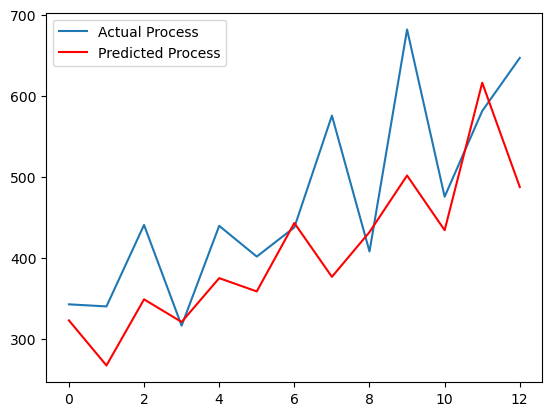

In [195]:
# Plot forecasts against actual outcomes
plt.plot(test, label='Actual Process')
plt.plot(predictions, color='red', label='Predicted Process')
plt.legend()

#Here the blue process would be the process with correlation exactly as required
#The red process is the one predicted using ARMA. 
#Some hyperparameter tuning of p and q values would give us a closer fit

In [197]:
# Evaluate forecasts using RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE:', rmse)

Test RMSE: 96.68624624785664
